In [188]:
import pandas as pd
import string
from tqdm.auto import tqdm, trange
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
import nltk
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_7983.csv')

df


,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm
0,2022-01-02,1,70,https://mbasic.facebook.com/groups/32275791783...,Привет! Вопрос о пересечении границы Беларусь-...,Привет Вопрос о пересечении границы Беларусь П...,привет вопрос о пересечении границы беларусь п...,пересечении границы беларусь польша,пересечение граница беларусь польша
1,2022-01-03,13,10,https://mbasic.facebook.com/groups/32275791783...,Также делаю квесты для детей для...,Также делаю квесты для детей для,также делаю квесты для детей для,квесты детей,квеста
2,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...
3,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...
4,2022-01-03,14,380,https://mbasic.facebook.com/groups/32275791783...,"Кто-нибудь в курсе, что за изменения в отношен...",Кто нибудь в курсе что за изменения в отношени...,кто нибудь в курсе что за изменения в отношени...,курсе отношении выдачи карты поляка,отношение выдача карта поляк
...,...,...,...,...,...,...,...,...,...
7978,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...
7979,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...
7980,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...
7981,2022-07-21,0,50,https://mbasic.facebook.com/groups/32275791783...,"Всем привет Подскажите, где оформить доверенно...",Всем привет Подскажите где оформить довереннос...,всем привет подскажите где оформить довереннос...,подскажите оформить доверенность машину поеду ...,оформлять доверенность поехать польша рб знако...


In [189]:
#import dostoevsky analyser
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [190]:
list_of_posts = df['postfs'].tolist()

In [191]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
sentiment_list = []
results = model.predict(list_of_posts, k=2)
for sentiment in results:
    sentiment_list.append(sentiment)

In [192]:
neutral_list = []
negative_list = []
positive_list = []
#speech_list = []
#skip_list = []
for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')
    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))

In [193]:
df['neutral'] = neutral_list
df['negative'] = negative_list
df['positive'] = positive_list

In [194]:
df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,neutral,negative,positive
0,2022-01-02,1,70,https://mbasic.facebook.com/groups/32275791783...,Привет! Вопрос о пересечении границы Беларусь-...,Привет Вопрос о пересечении границы Беларусь П...,привет вопрос о пересечении границы беларусь п...,пересечении границы беларусь польша,пересечение граница беларусь польша,0.817585,0.000000,0.0
1,2022-01-03,13,10,https://mbasic.facebook.com/groups/32275791783...,Также делаю квесты для детей для...,Также делаю квесты для детей для,также делаю квесты для детей для,квесты детей,квеста,0.901931,0.044691,0.0
2,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,0.936295,0.000000,0.0
3,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,0.476590,0.000000,0.0
4,2022-01-03,14,380,https://mbasic.facebook.com/groups/32275791783...,"Кто-нибудь в курсе, что за изменения в отношен...",Кто нибудь в курсе что за изменения в отношени...,кто нибудь в курсе что за изменения в отношени...,курсе отношении выдачи карты поляка,отношение выдача карта поляк,0.964865,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7978,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,0.843905,0.090103,0.0
7979,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,0.100889,0.000000,0.0
7980,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...,0.000000,0.156115,0.0
7981,2022-07-21,0,50,https://mbasic.facebook.com/groups/32275791783...,"Всем привет Подскажите, где оформить доверенно...",Всем привет Подскажите где оформить довереннос...,всем привет подскажите где оформить довереннос...,подскажите оформить доверенность машину поеду ...,оформлять доверенность поехать польша рб знако...,0.812877,0.000000,0.0


In [195]:
THRESHOLD = 0.4

conditions = [
    (df['negative'] >= THRESHOLD),
    (df['neutral'] >= THRESHOLD ) & (df['neutral'] <= THRESHOLD),
    (df['positive'] >= THRESHOLD)
     ]

values = ["neg", "neu", "pos"]
df['label'] = np.select(conditions, values)

df.head()
#& (df['positive'] <= THRESHOLD),

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,neutral,negative,positive,label
0,2022-01-02,1,70,https://mbasic.facebook.com/groups/32275791783...,Привет! Вопрос о пересечении границы Беларусь-...,Привет Вопрос о пересечении границы Беларусь П...,привет вопрос о пересечении границы беларусь п...,пересечении границы беларусь польша,пересечение граница беларусь польша,0.817585,0.000000,0.0,0
1,2022-01-03,13,10,https://mbasic.facebook.com/groups/32275791783...,Также делаю квесты для детей для...,Также делаю квесты для детей для,также делаю квесты для детей для,квесты детей,квеста,0.901931,0.044691,0.0,0
2,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,0.936295,0.000000,0.0,0
3,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,0.476590,0.000000,0.0,0
4,2022-01-03,14,380,https://mbasic.facebook.com/groups/32275791783...,"Кто-нибудь в курсе, что за изменения в отношен...",Кто нибудь в курсе что за изменения в отношени...,кто нибудь в курсе что за изменения в отношени...,курсе отношении выдачи карты поляка,отношение выдача карта поляк,0.964865,0.000000,0.0,0


In [196]:
df['label'] = df['label'].replace('0', 'neu', regex=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_1488/1461086792.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, "Sentiment of 'all posts")

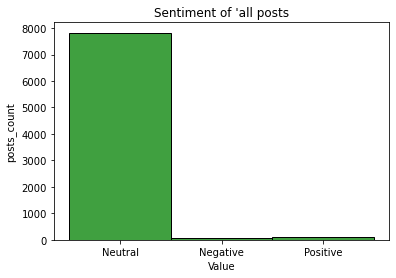

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['label'].value_counts()

ax = sns.histplot(df["label"], color = 'green')
#ax.set_style('darkgrid')
ax.set_xlabel("Value")
ax.set_ylabel("posts_count")

ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])
ax.set_title("Sentiment of 'all posts") 

In [198]:
df['positive'].sum()

175.45976626500487

In [199]:
df['neutral'].sum()

5078.697937061079

In [200]:
df['negative'].sum()

546.4027134393546

In [201]:
all_posts_labeled = df

In [202]:
all_posts_labeled.to_csv('C:/Users/dell/Desktop/pliki/all_posts_labeled.csv', encoding = 'utf-8',  index = False)

In [203]:
df['label'].str.contains('neu').sum()

7825

In [204]:
df['label'].str.contains('pos').sum()

56

In [205]:
df['label'].str.contains('neg').sum()

102

In [206]:
neg = df[df['label']=='neg']
neg = neg.groupby(['date'],as_index=False).count()

pos = df[df['label']=='pos']
pos = pos.groupby(['date'],as_index=False).count()

#neu = df[df['label']=='neu']
#neu = neu.groupby(['date'],as_index=False).count()


pos = pos[['date']]
neg = neg[['date']]
#neu = neu[['date']]

In [244]:
import plotly.graph_objs as go

fig = go.Figure()


for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'],
                             name = col,
                              mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )


fig.show()

In [245]:
df_pos = df[df['label']=='pos']
df_neu = df[df['label']=='neu']
df_neg = df[df['label']=='neg']

In [209]:
df_pos

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,neutral,negative,positive,label
17,2022-01-05,0,10,https://mbasic.facebook.com/groups/32275791783...,"Кто любит чистоту и домашнюю обстановку,Добр",Кто любит чистоту и домашнюю обстановку Добр,кто любит чистоту и домашнюю обстановку добр,любит чистоту домашнюю обстановку добр,чистота домашний обстановка,0.187143,0.000000,0.500010,pos
322,2022-01-13,2,30,https://mbasic.facebook.com/groups/32275791783...,"Ищу нашего юриста , которые окончил польский в...",Ищу нашего юриста которые окончил польский вуз...,ищу нашего юриста которые окончил польский вуз...,ищу юриста окончил польский вуз права польские...,юрист оканчивать польский вуз польский,0.250923,0.000000,0.546748,pos
408,2022-01-15,4,0,https://mbasic.facebook.com/groups/32275791783...,"Домашняя выпечка: орешки со сгущенкой, вафельн...",Домашняя выпечка орешки со сгущенкой вафельные...,домашняя выпечка орешки со сгущенкой вафельные...,домашняя выпечка орешки сгущенкой вафельные тр...,домашний выпечка орешек сгущенка вафельный тру...,0.000000,0.000000,0.585111,pos
488,2022-01-16,7,60,https://mbasic.facebook.com/groups/32275791783...,Приглашаю на сеанс качественной татуировки и п...,Приглашаю на сеанс качественной татуировки и п...,приглашаю на сеанс качественной татуировки и п...,приглашаю сеанс качественной татуировки приятн...,приглашать сеанс качественный татуировка прият...,0.407343,0.000000,0.817585,pos
589,2022-01-18,0,0,https://mbasic.facebook.com/groups/32275791783...,"Сдается квартира, в районе Piaseczno, хозяева ...",Сдается квартира в районе Piaseczno хозяева оч...,сдается квартира в районе piaseczno хозяева оч...,сдается квартира районе piaseczno хозяева милы...,сдаваться квартира район piaseczno хозяин милы...,0.191943,0.000000,0.538993,pos
811,2022-02-03,14,80,https://mbasic.facebook.com/groups/32275791783...,"Иногда новые места , знакомства кардинально ме...",Иногда новые места знакомства кардинально меня...,иногда новые места знакомства кардинально меня...,новые места знакомства кардинально меняют зимо...,знакомство кардинальный менять зима правильно ...,0.370235,0.000000,0.445540,pos
823,2022-02-04,1,0,https://mbasic.facebook.com/groups/32275791783...,Praca szuka człowieka !!!,Praca szuka człowieka,praca szuka człowieka,praca szuka człowieka,praca szuka człowieka,0.760661,0.000000,0.600198,pos
892,2022-02-06,6,0,https://mbasic.facebook.com/groups/32275791783...,кі вольнасць перадусім!Чакаем на заняткі па вы...,кі вольнасць перадусім Чакаем на заняткі па вы...,кі вольнасць перадусім чакаем на заняткі па вы...,кі вольнасць перадусім чакаем заняткі выходных...,кі вольнасць перадусім чакай заняткі выходной ...,0.000000,0.000000,0.546748,pos
909,2022-02-06,67,220,https://mbasic.facebook.com/groups/32275791783...,Вкусная домашняя выпечка на праздники и просто...,Вкусная домашняя выпечка на праздники и просто...,вкусная домашняя выпечка на праздники и просто...,вкусная домашняя выпечка праздники души,вкусный домашний выпечка праздник,0.152042,0.000000,0.546748,pos
984,2022-02-08,1,0,https://mbasic.facebook.com/groups/32275791783...,Этот пилинг давно завоевал мое сердце и любовь...,Этот пилинг давно завоевал мое сердце и любовь...,этот пилинг давно завоевал мое сердце и любовь...,пилинг завоевал сердце любовь biorepeelcl двух...,пилинг завоевывать сердце любовь biorepeelcl д...,0.445540,0.000000,0.445540,pos


In [210]:
df_neg

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,neutral,negative,positive,label
48,2022-01-06,10,40,https://mbasic.facebook.com/groups/32275791783...,Общественные деятели...,Общественные деятели,общественные деятели,общественные деятели,общественный деятель,0.679189,0.476590,0.0,neg
298,2022-01-13,8,0,https://mbasic.facebook.com/groups/32275791783...,Вести с (фронта) границы. Брест. Автобус выеха...,Вести с фронта границы Брест Автобус выехал из...,вести с фронта границы брест автобус выехал из...,вести фронта границы брест автобус выехал минс...,весть фронт граница брест автобус выезжать мин...,0.554480,0.437833,0.0,neg
311,2022-01-13,0,120,https://mbasic.facebook.com/groups/32275791783...,Добрый день. 1 февраля прилетаю в Варшаву. Уже...,Добрый день февраля прилетаю в Варшаву Уже сей...,добрый день февраля прилетаю в варшаву уже сей...,февраля прилетаю варшаву ищу жильё работу запу...,февраль прилетать варшава жилье запутываться т...,0.000000,0.422515,0.0,neg
321,2022-01-13,6,220,https://mbasic.facebook.com/groups/32275791783...,"КАЛЯДНЫ ПАДАРУНАК ад праекта ""Традыцыйны строй...",КАЛЯДНЫ ПАДАРУНАК ад праекта Традыцыйны строй ...,калядны падарунак ад праекта традыцыйны строй ...,калядны падарунак ад праекта традыцыйны строй ...,калядный падарунак ад праект традыцыйн строй в...,0.196836,0.422515,0.0,neg
355,2022-01-14,0,0,https://mbasic.facebook.com/groups/32275791783...,Шукаю сям’ю для коціка. Суседзі пераяжджалі і ...,Шукаю сям’ю для коціка Суседзі пераяжджалі і к...,шукаю сям’ю для коціка суседзі пераяжджалі і к...,шукаю сям ’ коціка суседзі пераяжджалі кінулі ...,шукать сям ’ коціка суседзі пераяжджалі кіну...,0.000000,0.414909,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,2022-07-12,8,0,https://mbasic.facebook.com/groups/32275791783...,"Дарагія сябры, я працую агентам нерухомасці! П...",Дарагія сябры я працую агентам нерухомасці Піш...,дарагія сябры я працую агентам нерухомасці піш...,дарагія сябры працую агентам нерухомасці пішу ...,дарагия сябр працуй агент нерухомасці пішу мэт...,0.000000,0.453272,0.0,neg
7691,2022-07-15,0,0,https://mbasic.facebook.com/groups/32275791783...,"Уже завтра, субота 16 липня",Уже завтра субота липня,уже завтра субота липня,завтра субота липня,завтра субот липня,0.637041,0.430157,0.0,neg
7767,2022-07-17,3,0,https://mbasic.facebook.com/groups/32275791783...,"Отдам боксерки фирмы Белкелме, кожа. Несколько...",Отдам боксерки фирмы Белкелме кожа Несколько л...,отдам боксерки фирмы белкелме кожа несколько л...,отдам боксерки фирмы белкелме кожа пылится вык...,отдавать боксерка белкелма кожа пылиться выкид...,0.615098,0.679189,0.0,neg
7773,2022-07-17,17,0,https://mbasic.facebook.com/groups/32275791783...,"Паслухайце. Варта. Асабліва тым, хто забыўся, ...",Паслухайце Варта Асабліва тым хто забыўся што ...,паслухайце варта асабліва тым хто забыўся што ...,паслухайце варта асабліва тым забыўся обяцала ...,паслухаец варта асабліва тым забыўся обяцать ч...,0.000000,0.407343,0.0,neg


In [211]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df,'label')

,Total,Percentage
neu,7825,98.02
neg,102,1.28
pos,56,0.70


In [212]:
pie = count_values_in_column(df,'label')
print(pie)

     Total  Percentage
neu   7825       98.02
neg    102        1.28
pos     56        0.70


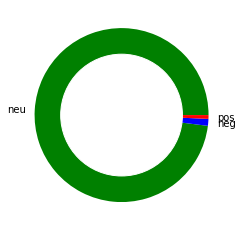

In [213]:
#create a chart by using number of sentiment posts

# create data for Pie Chart
pichart = count_values_in_column(df,'label')
names= pie.index
size=pie['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [214]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


with open ('C:/Users/dell/Desktop/pliki/stop.txt', 'r',  encoding='utf-8') as stop_file:
    russian_stopwords = [word.strip() for word in stop_file.readlines()]


In [215]:
#df_pos['text_lemm']

In [216]:
df_neg['text_lemm']

48                                  общественный деятель 
298     весть фронт граница брест автобус выезжать мин...
311     февраль прилетать варшава жилье запутываться т...
321     калядный падарунак ад праект традыцыйн строй в...
355     шукать сям  ’  коціка суседзі пераяжджалі кіну...
                              ...                        
7548    дарагия сябр працуй агент нерухомасці пішу мэт...
7691                                  завтра субот липня 
7767    отдавать боксерка белкелма кожа пылиться выкид...
7773    паслухаец варта асабліва тым забыўся обяцать ч...
7903                     история письмо февраль выезжать 
Name: text_lemm, Length: 102, dtype: object

In [217]:
def create_wordcloud(text):
    stopwords = russian_stopwords
    wc = WordCloud(background_color='white',
                   colormap="summer",
                   max_words=250,
                   stopwords=stopwords,
                   width = 800,
                   height = 400,
                   repeat=True)
    wc.generate(str(text))
    wc.to_file('positive.png')
#   print('Word Cloud of positive sentiment')
    path='positive.png'
    display(Image.open(path))
    
    
    
    

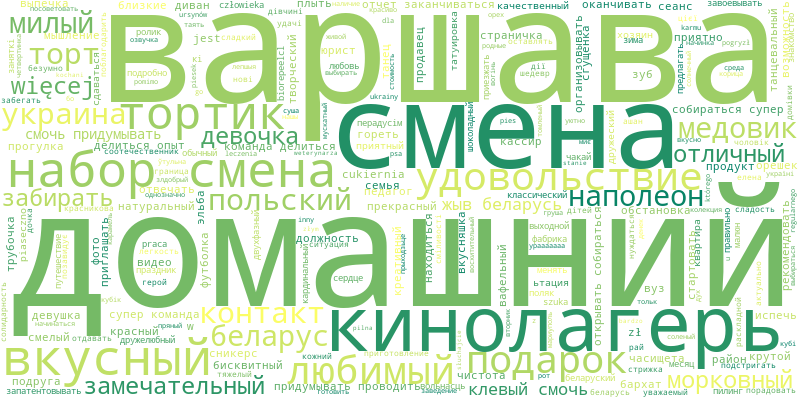

In [218]:
create_wordcloud(df_pos['text_lemm'].values)

In [225]:
def create_wordcloud(text):

    stopwords = russian_stopwords
    wc = WordCloud(background_color='black',
                   colormap="autumn",
                   max_words=200,
                   width = 800,
                   height = 400,
                   stopwords=stopwords,
                   repeat=True)
    wc.generate(str(text))
    wc.to_file('negative.png')
#    print('Word Cloud of negative sentiment')
    path='negative.png'
    display(Image.open(path))

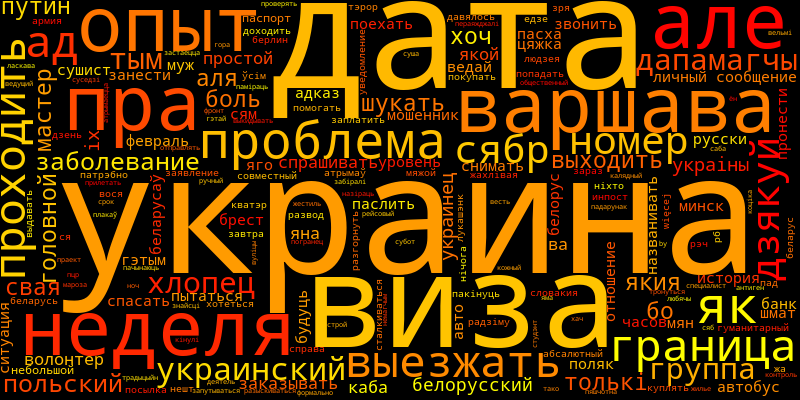

In [226]:
create_wordcloud(df_neg['text_lemm'].values)

In [227]:
count = df_neg['label'].value_counts()
display(count)

neg    102
Name: label, dtype: int64

In [228]:
count = df_pos['label'].value_counts()
display(count)

pos    56
Name: label, dtype: int64

In [230]:
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\all_posts_labeled.csv')

df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,neutral,negative,positive,label
0,2022-01-02,1,70,https://mbasic.facebook.com/groups/32275791783...,Привет! Вопрос о пересечении границы Беларусь-...,Привет Вопрос о пересечении границы Беларусь П...,привет вопрос о пересечении границы беларусь п...,пересечении границы беларусь польша,пересечение граница беларусь польша,0.817585,0.000000,0.0,neu
1,2022-01-03,13,10,https://mbasic.facebook.com/groups/32275791783...,Также делаю квесты для детей для...,Также делаю квесты для детей для,также делаю квесты для детей для,квесты детей,квеста,0.901931,0.044691,0.0,neu
2,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,0.936295,0.000000,0.0,neu
3,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,0.476590,0.000000,0.0,neu
4,2022-01-03,14,380,https://mbasic.facebook.com/groups/32275791783...,"Кто-нибудь в курсе, что за изменения в отношен...",Кто нибудь в курсе что за изменения в отношени...,кто нибудь в курсе что за изменения в отношени...,курсе отношении выдачи карты поляка,отношение выдача карта поляк,0.964865,0.000000,0.0,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,0.843905,0.090103,0.0,neu
7979,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,0.100889,0.000000,0.0,neu
7980,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...,0.000000,0.156115,0.0,neu
7981,2022-07-21,0,50,https://mbasic.facebook.com/groups/32275791783...,"Всем привет Подскажите, где оформить доверенно...",Всем привет Подскажите где оформить довереннос...,всем привет подскажите где оформить довереннос...,подскажите оформить доверенность машину поеду ...,оформлять доверенность поехать польша рб знако...,0.812877,0.000000,0.0,neu


In [231]:
df['split'] = df['text_lemm'].apply(lambda x: x.split(" "))
df.head()


,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,neutral,negative,positive,label,split
0,2022-01-02,1,70,https://mbasic.facebook.com/groups/32275791783...,Привет! Вопрос о пересечении границы Беларусь-...,Привет Вопрос о пересечении границы Беларусь П...,привет вопрос о пересечении границы беларусь п...,пересечении границы беларусь польша,пересечение граница беларусь польша,0.817585,0.000000,0.0,neu,"[пересечение, граница, беларусь, польша, ]"
1,2022-01-03,13,10,https://mbasic.facebook.com/groups/32275791783...,Также делаю квесты для детей для...,Также делаю квесты для детей для,также делаю квесты для детей для,квесты детей,квеста,0.901931,0.044691,0.0,neu,"[квеста, ]"
2,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,0.936295,0.000000,0.0,neu,"[планировать, открывать, счет, банк, pko, начи..."
3,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,0.476590,0.000000,0.0,neu,"[ситуация, рб, числиться, тунеядец, предоставл..."
4,2022-01-03,14,380,https://mbasic.facebook.com/groups/32275791783...,"Кто-нибудь в курсе, что за изменения в отношен...",Кто нибудь в курсе что за изменения в отношени...,кто нибудь в курсе что за изменения в отношени...,курсе отношении выдачи карты поляка,отношение выдача карта поляк,0.964865,0.000000,0.0,neu,"[отношение, выдача, карта, поляк, ]"


In [233]:
import itertools
# negative reviews
negative = df[df['label']=='neg']['split']
print("Total negative lines: ", len(negative))
negative_words = list(itertools.chain(*negative))
print("Total words in negative lines:", len(negative_words))


Total negative lines:  102
Total words in negative lines: 1341


In [234]:
#negative_words

In [235]:
positive = df[df['label']=='pos']['split']
print("Total positive lines: ", len(positive))
positive_words = list(itertools.chain(*positive))
print("Total words in positive lines:", len(positive_words))

Total positive lines:  56
Total words in positive lines: 576


In [238]:
# Convert the date column to datetime values
df['date'] = pd.to_datetime(df['date'])

# Make date the index of the DataFrame
df = df.set_index('date')

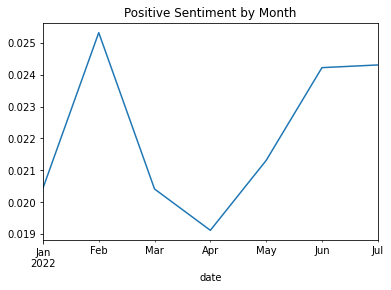

In [239]:
df.resample('M')['positive'].mean().plot(
    title="Positive Sentiment by Month");

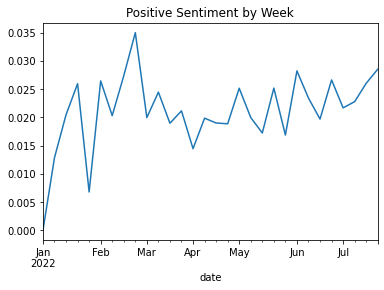

In [240]:
df.resample('W')['positive'].mean().plot(
    title="Positive Sentiment by Week");

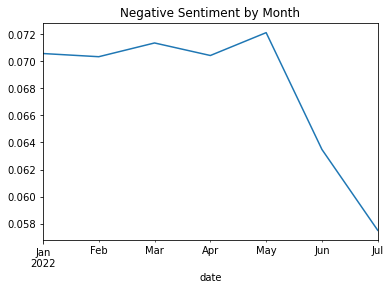

In [241]:
df.resample('M')['negative'].mean().plot(
    title="Negative Sentiment by Month");

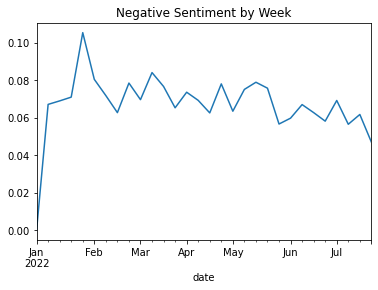

In [242]:
df.resample('W')['negative'].mean().plot(
    title="Negative Sentiment by Week");

In [295]:
import pandas as pd
import numpy as np

In [296]:
df[['negative','positive']].mean()

negative    0.068420
positive    0.021985
dtype: float64

In [260]:
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\all_posts_labeled.csv')

df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_sw,text_lemm,neutral,negative,positive,label
0,2022-01-02,1,70,https://mbasic.facebook.com/groups/32275791783...,Привет! Вопрос о пересечении границы Беларусь-...,Привет Вопрос о пересечении границы Беларусь П...,привет вопрос о пересечении границы беларусь п...,пересечении границы беларусь польша,пересечение граница беларусь польша,0.817585,0.000000,0.0,neu
1,2022-01-03,13,10,https://mbasic.facebook.com/groups/32275791783...,Также делаю квесты для детей для...,Также делаю квесты для детей для,также делаю квесты для детей для,квесты детей,квеста,0.901931,0.044691,0.0,neu
2,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,0.936295,0.000000,0.0,neu
3,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,0.476590,0.000000,0.0,neu
4,2022-01-03,14,380,https://mbasic.facebook.com/groups/32275791783...,"Кто-нибудь в курсе, что за изменения в отношен...",Кто нибудь в курсе что за изменения в отношени...,кто нибудь в курсе что за изменения в отношени...,курсе отношении выдачи карты поляка,отношение выдача карта поляк,0.964865,0.000000,0.0,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,0.843905,0.090103,0.0,neu
7979,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,0.100889,0.000000,0.0,neu
7980,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добрага дня шаноўныя нехта працуе турыстычных ...,добрага шаноўныя нехт працуй турыстычный агенц...,0.000000,0.156115,0.0,neu
7981,2022-07-21,0,50,https://mbasic.facebook.com/groups/32275791783...,"Всем привет Подскажите, где оформить доверенно...",Всем привет Подскажите где оформить довереннос...,всем привет подскажите где оформить довереннос...,подскажите оформить доверенность машину поеду ...,оформлять доверенность поехать польша рб знако...,0.812877,0.000000,0.0,neu


In [261]:
def news_comment_output(df, label):
    res = df[df['label'] == label].postfs.values
    print(f'{"=" * 10}')
    print("\n".join(comment for comment in res))

# random sample
news_sub = df.groupby('label').sample(n=5, random_state=7)

print("Positive comments")
news_comment_output(news_sub, "pos")

print("\nNeutral comments")
news_comment_output(news_sub, "neu")

print("\nNegative comments")
news_comment_output(news_sub, "neg")

Positive comments
Нові домівки наших дітей!!!  «Русский мир» в дії
кі вольнасць перадусім!Чакаем на заняткі па выходных,малюна
Кто любит чистоту и домашнюю обстановку,Добр
Добрый день! Может кто знает где найти можно такой патрубок на Мерседес лупатый
go karmu dla psa z Ukrainy, którego pogryzł inny pies. Piesek, pomimo regularnego leczenia u weterynarza, jest w bardzo złym stanie.Kochani, słuchajcie, jest pilna potrzeba kupna specjalistyczne

Neutral comments
Добрый вечер.  Предоставляем услуги по подбору, покупке и доставке автомобилей из стран EU.  -Авто с закрытых дилерских аукционов ( Нидерланды, Бельгия, Германия, Швеция и др.) автомобили -Автомобили любой ценовой категории Подберем лучший вариант под ваш бюджет. -Возможен безналичный расчет (официальный договор на 2 языках, никакой бесконтрольный передачи наличных средств). -Контакт с заказчиком на каждом этапе покупки и доставки...-Постлизинговые
Подскажите, пожалуйста, если кто сталкивался. из РБ? Достаточно ли декларации или 